# Linear Regression - IMT 572 Final Project - Group 1

In [29]:
#Importing Relevant Python Libraries and Modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics  

In [30]:
#Reading data from cleaning notebook
%store -r data
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Measles
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.538431
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.229557
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.200629
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1.300354
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1.405801


In [3]:
#Checking the unique values for Country Status column field
data.Status.unique()

array([1, 0])

In [4]:
#Creating two datasets, one for developing and another for developed countries
developing= data[data['Status']==1]
developed= data[data['Status']==0]

In [5]:
#Checking the count of sample data provided for developed and developing countries respectively
print(len(developed.index))
print(len(developing.index))

512
2426


There are 512 samples for developed countries and 2426 samples for developing countries

In [6]:
#Creating equal size samples including only variables of interest  for conducting hypothesis test
sample1= developed[['Status','Life expectancy ','Hepatitis B','Measles','Polio','Diphtheria ']]
sample2= developing[['Status','Life expectancy ','Hepatitis B','Measles','Polio','Diphtheria ']].sample(n=512, random_state=1)
print(len(sample1.index))
print(len(sample2.index))


512
512


In [7]:
#Merging the above two samples to create a sample with equal number of developing and developed countries data records
sample= pd.concat([sample1, sample2],axis=0)
sample.rename(columns={'Life expectancy ':'Life_Expectancy', 'Hepatitis B':'HepB','Diphtheria ':'Diphtheria'}, inplace=True)
sample


,Status,Life_Expectancy,HepB,Measles,Polio,Diphtheria
112,0,82.8,93.000000,0.034527,93.0,93.0
113,0,82.7,91.000000,0.158637,92.0,92.0
114,0,82.5,91.000000,0.073719,91.0,91.0
115,0,82.3,91.000000,0.092849,92.0,92.0
116,0,82.0,92.000000,0.088650,92.0,92.0
...,...,...,...,...,...,...
1310,1,73.1,36.000000,0.000000,99.0,96.0
87,1,75.4,9.000000,0.000000,94.0,93.0
1376,1,51.9,80.940461,5.274202,77.0,8.0
902,1,69.2,99.000000,0.000000,99.0,99.0


In [8]:
#from statsmodels.multivariate.manova import MANOVA
#maov=MANOVA.from_formula('Life_Expectancy + Status ~ HepB + Measles + Polio + Diphtheria ', data=sample)
#print(maov.mv_test())

In [47]:
#Conducting ANOVA test to verify the hypothesis
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod1 =ols('Life_Expectancy ~ HepB + Measles + Polio + Diphtheria', data=sample).fit() #two-way ANOVA test
aov1= sm.stats.anova_lm(mod1, type=2)
mod2 =ols('Life_Expectancy ~ Status', data=sample).fit() #One-way ANOVA test
aov2= sm.stats.anova_lm(mod2, type=2)
print(aov1)
print(aov2)

                df        sum_sq       mean_sq           F        PR(>F)
HepB           1.0   3705.785721   3705.785721   62.037293  8.600744e-15
Measles        1.0   2896.840981   2896.840981   48.495026  5.927916e-12
Polio          1.0  14039.949338  14039.949338  235.037998  6.838405e-48
Diphtheria     1.0   4099.776799   4099.776799   68.632964  3.703425e-16
Residual    1019.0  60869.767843     59.734807         NaN           NaN
              df        sum_sq       mean_sq           F         PR(>F)
Status       1.0  37328.052922  37328.052922  790.100583  2.985822e-129
Residual  1022.0  48284.067761     47.244685         NaN            NaN


In [44]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     103.6
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           4.98e-74
Time:                        23:44:14   Log-Likelihood:                -3544.5
No. Observations:                1024   AIC:                             7099.
Df Residuals:                    1019   BIC:                             7124.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.7445      1.255     42.020      0.000      50.281      55.208
HepB          -0.0114      0.013     -0.909      0.363      -0.036       0.013
Measles       -0.2668      0.063     -4.206      0.000      -0.391      -0.142
Polio          0.1165      0.015      7.590      0.000       0.086       0.147
Diphtheria     0.1323      0.016      8.285      0.000       0.101       0.164
==============================================================================
Omnibus:                       84.010   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.472
Skew:                          -0.605   Prob(JB):                     2.83e-29
Kurtosis:                       4.272   Cond. No.                         781.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     790.1
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          2.99e-129
Time:                        23:40:28   Log-Likelihood:                -3425.9
No. Observations:                1024   AIC:                             6856.
Df Residuals:                    1022   BIC:                             6866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.1979      0.304    260.719      0.000      78.602      79.794
Status       -12.0753      0.430    -28.109      0.000     -12.918     -11.232
==============================================================================
Omnibus:                       70.584   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.231
Skew:                          -0.614   Prob(JB):                     4.21e-20
Kurtosis:                       3.763   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-Values is less then .05, hence we reject the null hypothesis. There is a statistically significant relationship between Life Expectancy and Country Status (Developing or Developed).

In [10]:
#Creating target variable and independent variables dataset
df_X= data.drop(['Life expectancy '], axis=1)
df_y = data['Life expectancy ']

In [11]:
print(df_X.columns)
print(df_y)


Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Measles'],
      dtype='object')
0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64


In [12]:
X = df_X
y = df_y

In [13]:
#Splitting the DataFrame instances into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [14]:
#Cross-checking the splitted data shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2350, 21)
(588, 21)
(2350,)
(588,)


In [15]:
##Scaling the data using StandardScaler before performing PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [16]:
#Initializing PCA object, fitting and transforming training and test data 
pca= PCA()
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(2350, 21)
(588, 21)


In [17]:
#Checking the Variance contributed by each of the 21b features
explained_variance= pca.explained_variance_ratio_
explained_variance

array([2.79283639e-01, 1.28269045e-01, 8.54717206e-02, 6.64158566e-02,
       5.95785558e-02, 5.06261326e-02, 4.64213383e-02, 4.12386669e-02,
       3.78039536e-02, 3.71563671e-02, 2.92761021e-02, 2.64757872e-02,
       2.28777051e-02, 1.96328588e-02, 1.91401556e-02, 1.79457149e-02,
       1.49721747e-02, 9.16653375e-03, 5.31207996e-03, 2.81391727e-03,
       1.21695500e-04])

<function matplotlib.pyplot.show(close=None, block=None)>

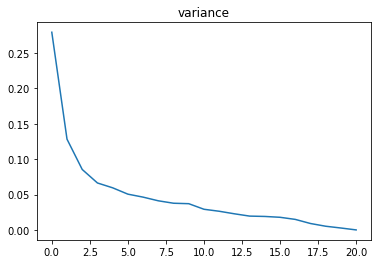

In [34]:
#Plotting the variance (Elbow Analysis)
plt.plot(explained_variance)
plt.title("variance")
plt.show


In [19]:
#Performing PCA with a threshold value of .75
pca1= PCA(.75)
X_train_th1 = pca1.fit_transform(X_train) 
X_test_th1 = pca1.transform(X_test)
print(X_train_th1.shape)
print(X_test_th1.shape)

(2350, 8)
(588, 8)


In [20]:
#Performing PCA with a threshold value of .95
pca2= PCA(.95)
X_train_th2 = pca2.fit_transform(X_train) 
X_test_th2 = pca2.transform(X_test)
print(X_train_th2.shape)
print(X_test_th2.shape)

(2350, 16)
(588, 16)


In [21]:
#Performing Linear Regression on the principal model keeping only 8 attributes contributing to 75% variance
#and predicting life expectancy value
print(X_train_th1.shape)
print(y_train.shape)
linear_model1= LinearRegression()
linear_model1.fit(X_train_th1,y_train)
print(linear_model1.intercept_)
print(linear_model1.coef_)
y_pred_1= linear_model1.predict(X_test_th1)

(2350, 8)
(2350,)
69.10081888733868
[-3.04074107  1.55709554 -1.28017832 -1.75576542  0.90986437 -0.08320959
 -1.07795224 -0.39073642]


In [22]:
#R Squared Value (.75 PCA)
print(linear_model1.score(X_train_th1, y_train))

0.7801779191752156


In [23]:
#Adjusted Squared Value (.75 PCA)
adjusted_r_squared_th1 = 1 - (1-linear_model1.score(X_train_th1, y_train))*(len(X_train_th1)-1)/(len(X_train_th1)-X_train_th1.shape[1]-1)
print(adjusted_r_squared_th1)
#adjusted_r_squared_th1 = 1 - (1-linear_model1.score(X_train_th1, y_train))*(X_train_th1.shape[0]-1)/(X_train_th1.shape[0]-X_train_th1.shape[1]-1)
#print(adjusted_r_squared_th1)

0.7794267117225893


In [24]:
#Performing Linear Regression on the principal model keeping only 16 attributes contributing to 95% variance and predicting life expectancy value 
print(X_train_th2.shape)
print(y_train.shape)
linear_model2= LinearRegression()
linear_model2.fit(X_train_th2,y_train)
print(linear_model2.intercept_)
print(linear_model2.coef_)
y_pred_2= linear_model2.predict(X_test_th2)

(2350, 16)
(2350,)
69.10081888733868
[-3.04074107  1.55709554 -1.28017832 -1.75576542  0.90986437 -0.08320959
 -1.07795224 -0.39073642 -0.27742955 -1.55301705 -0.85186574  0.48194521
 -0.20614005 -0.31656784  0.15172955 -0.03293417]


In [25]:
#R Squared Value (.95 PCA)
print(linear_model2.score(X_train_th2, y_train))

0.8089148723489155


In [26]:
#Adjusted Squared Value (.95 PCA)
adjusted_r_squared_th2 = 1 - (1-linear_model2.score(X_train_th2, y_train))*(len(X_train_th2)-1)/(len(X_train_th2)-X_train_th2.shape[1]-1)
print(adjusted_r_squared_th2)

0.8076043871185608


In [27]:
##MAE, ME, and RMSE for .75 PCA
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))

Mean Absolute Error: 3.353720226595512
Mean Squared Error: 19.709594574432685
Root Mean Squared Error: 4.439548915648152


In [28]:
#MAE, ME, and RMSE for .95 PCA
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))

Mean Absolute Error: 3.1009481785996367
Mean Squared Error: 17.45658992021197
Root Mean Squared Error: 4.178108414128572
